In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
start_df = pd.read_csv('downloads/clean_startup_data_replace.csv')
print(start_df.shape)

(54264, 13)


In [2]:
# take a look at the first 5 rows
start_df.head()

Unnamed: 0             Group  District    DistName  County  Region  ERW  \
0           0      All Students      1902  Cayuga ISD       1       7  503   
1           1  African American      1902  Cayuga ISD       1       7    0   
2           2   American Indian      1902  Cayuga ISD       1       7    0   
3           3             Asian      1902  Cayuga ISD       1       7    0   
4           4          Hispanic      1902  Cayuga ISD       1       7  467   

   Math  Total Grads_Mskd Exnees_Mskd Crit_Mskd TSI_Both_Mskd  
0   476  980.0        <50         <25       <25           <25  
1     0    0.0        <25         <25       <25           <25  
2     0    0.0        <25         <25       <25           <25  
3     0    0.0        <25         <25       <25           <25  
4   433  900.0        <25         <25       <25           <25

In [3]:
start_df.drop(['County'], axis=1, inplace=True)
start_df.drop(['Region'], axis=1, inplace=True)

In [4]:
start_df.head()

Unnamed: 0             Group  District    DistName  ERW  Math  Total  \
0           0      All Students      1902  Cayuga ISD  503   476  980.0   
1           1  African American      1902  Cayuga ISD    0     0    0.0   
2           2   American Indian      1902  Cayuga ISD    0     0    0.0   
3           3             Asian      1902  Cayuga ISD    0     0    0.0   
4           4          Hispanic      1902  Cayuga ISD  467   433  900.0   

  Grads_Mskd Exnees_Mskd Crit_Mskd TSI_Both_Mskd  
0        <50         <25       <25           <25  
1        <25         <25       <25           <25  
2        <25         <25       <25           <25  
3        <25         <25       <25           <25  
4        <25         <25       <25           <25

In [5]:
# drop SAT zero scores
df_filtered = start_df[start_df['ERW'] != 0]

In [6]:
df_filtered.head()

Unnamed: 0                           Group  District    DistName  ERW  \
0            0                    All Students      1902  Cayuga ISD  503   
4            4                        Hispanic      1902  Cayuga ISD  467   
6            6                           White      1902  Cayuga ISD  519   
9            9      Economically Disadvantaged      1902  Cayuga ISD  455   
10          10  Not Economically Disadvantaged      1902  Cayuga ISD  523   

    Math   Total Grads_Mskd Exnees_Mskd Crit_Mskd TSI_Both_Mskd  
0    476   980.0        <50         <25       <25           <25  
4    433   900.0        <25         <25       <25           <25  
6    496  1016.0        <50         <25       <25           <25  
9    420   875.0        <25         <25       <25           <25  
10   499  1021.0        <50         <25       <25           <25

In [7]:
#Tell me the mean SAT score of each district
sat_mean_values = df_filtered.groupby('District')['ERW','Math', 'Total'].mean()
sat_mean_values = sat_mean_values.reset_index()

print(sat_mean_values)

     District         ERW        Math        Total
0        1902  509.280000  480.760000   990.280000
1        1903  493.230769  474.538462   967.653846
2        1904  502.269231  473.115385   975.384615
3        1906  524.391304  487.826087  1012.304348
4        1907  529.892857  530.750000  1060.392857
..        ...         ...         ...          ...
879    251901  463.740741  485.518519   949.148148
880    252901  535.200000  522.200000  1057.720000
881    252903  526.652174  526.652174  1053.304348
882    253901  665.000000  635.000000  1300.000000
883    254901  429.809524  432.714286   863.333333

[884 rows x 4 columns]


/var/folders/4q/cw1njjys7gdbn2qhj_ntb6740000gn/T/ipykernel_67748/1651335989.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sat_mean_values = df_filtered.groupby('District')['ERW','Math', 'Total'].mean()


In [8]:
sat_mean_values.head()

District         ERW        Math        Total
0      1902  509.280000  480.760000   990.280000
1      1903  493.230769  474.538462   967.653846
2      1904  502.269231  473.115385   975.384615
3      1906  524.391304  487.826087  1012.304348
4      1907  529.892857  530.750000  1060.392857

# Summarized Instructional Expenditures 2022
Source:Texas Education Agency

In [9]:
expenditures = pd.read_excel('downloads/summarized-instructional-expenditures-20132022.xlsx')
print(expenditures.shape)

(1271, 32)


In [10]:
expenditures.head()

DISTRICT       DISTNAME  Instructional Expenditures 2013  \
0   001902     CAYUGA ISD                        3508890.0   
1   001903    ELKHART ISD                        5772817.0   
2   001904  FRANKSTON ISD                        3839354.0   
3   001906     NECHES ISD                        2074606.0   
4   001907  PALESTINE ISD                       17483258.0   

   Total Expenditures 2013  Ratio 2013 (%)  Instructional Expenditures 2014  \
0                5959191.0            58.9                        3501799.0   
1                9587979.0            60.2                        6006093.0   
2                6335441.0            60.6                        3957048.0   
3                3612302.0            57.4                        2075809.0   
4               29838717.0            58.6                       20004067.0   

   Total Expenditures 2014  Ratio 2014  (%)  Instructional Expenditures 2015  \
0                5823640.0             60.1                        3547574.0   
1                9752507.0             61.6                        6414338.0   
2                6764455.0             58.5                        4106915.0   
3                3696621.0             56.2                        2157336.0   
4               33757359.0             59.3                       19511551.0   

   Total Expenditures 2015  ...  Ratio 2019 (%)  \
0                5868863.0  ...            58.0   
1               10339095.0  ...            63.2   
2                7222332.0  ...            57.0   
3                3829002.0  ...            54.3   
4               33590079.0  ...            57.6   

   Instructional Expenditures 2020  Total Expenditures 2020  Ratio 2020 (%)  \
0                        3938482.0                6519372.0            60.4   
1                        8174218.0               13036233.0            62.7   
2                        5587829.0                9648440.0            57.9   
3                        2616422.0                4630289.0            56.5   
4                       25170908.0               41903744.0            60.1   

   Instructional Expenditures 2021  Total Expenditures 2021  Ratio 2021 (%)  \
0                        3993758.0                6910774.0            57.8   
1                        8676730.0               13693296.0            63.4   
2                        5504960.0                9568092.0            57.5   
3                        2635744.0                4709122.0            56.0   
4                       26391916.0               43017866.0            61.4   

   Instructional Expenditures 2122  Total Expenditures 2122  Ratio 2122 (%)  
0                        4336645.0                7605940.0            57.0  
1                        9044983.0               14718123.0            61.5  
2                        6118339.0               11253313.0            54.4  
3                        2699328.0                4915852.0            54.9  
4                       26116309.0               45476376.0            57.4  

[5 rows x 32 columns]

In [14]:
# Drop all columns except the specified one
expenditures = expenditures.loc[:, ['DISTRICT', 'Total Expenditures 2021','Total Expenditures 2122']]

KeyError: "None of [Index(['DISTRICT', 'Total Expenditures 2021', 'Total Expenditures 2122'], dtype='object')] are in the [columns]"

In [15]:
expenditures.head()

district_code       DISTNAME  total_exp_2021  total_exp_2022
0        001902     CAYUGA ISD       6910774.0       7605940.0
1        001903    ELKHART ISD      13693296.0      14718123.0
2        001904  FRANKSTON ISD       9568092.0      11253313.0
3        001906     NECHES ISD       4709122.0       4915852.0
4        001907  PALESTINE ISD      43017866.0      45476376.0

In [13]:
#Rename columns for uniformity
expenditures.rename(columns={'DISTRICT': 'district_code', 'Total Expenditures 2122': 'total_exp_2022', 'Total Expenditures 2021': 'total_exp_2021'}, inplace=True)

In [16]:
expenditures.drop(['DISTNAME'], axis=1, inplace=True)

In [19]:
sat_mean_values.head()
sat_mean_values.columns

Index(['District', 'ERW', 'Math', 'Total'], dtype='object')

In [20]:
sat_mean_values.head()

District         ERW        Math        Total
0      1902  509.280000  480.760000   990.280000
1      1903  493.230769  474.538462   967.653846
2      1904  502.269231  473.115385   975.384615
3      1906  524.391304  487.826087  1012.304348
4      1907  529.892857  530.750000  1060.392857

In [21]:
#Add leading zeros
sat_mean_values['District'] = sat_mean_values['District'].apply(lambda x: str(x).zfill(6))
sat_mean_values.head()

District         ERW        Math        Total
0   001902  509.280000  480.760000   990.280000
1   001903  493.230769  474.538462   967.653846
2   001904  502.269231  473.115385   975.384615
3   001906  524.391304  487.826087  1012.304348
4   001907  529.892857  530.750000  1060.392857

In [24]:
sat_mean_values.rename(columns={'District': 'district_code','Math':'avg_math_sat', 'ERW':'avg_english_SAT','Total':'avg_sat_total'})

district_code  avg_english_SAT  avg_math_sat  avg_sat_total
0          001902       509.280000    480.760000     990.280000
1          001903       493.230769    474.538462     967.653846
2          001904       502.269231    473.115385     975.384615
3          001906       524.391304    487.826087    1012.304348
4          001907       529.892857    530.750000    1060.392857
..            ...              ...           ...            ...
879        251901       463.740741    485.518519     949.148148
880        252901       535.200000    522.200000    1057.720000
881        252903       526.652174    526.652174    1053.304348
882        253901       665.000000    635.000000    1300.000000
883        254901       429.809524    432.714286     863.333333

[884 rows x 4 columns]

In [26]:
expenditures.columns


Index(['district_code', 'total_exp_2021', 'total_exp_2022'], dtype='object')

In [27]:
sat_mean_values.columns

Index(['District', 'ERW', 'Math', 'Total'], dtype='object')

In [30]:
sat_and_expenditures_df = pd.merge(sat_mean_values, expenditures, left_on='District', right_on='district_code')


In [31]:
sat_and_expenditures_df.head()

District         ERW        Math        Total district_code  total_exp_2021  \
0   001902  509.280000  480.760000   990.280000        001902       6910774.0   
1   001903  493.230769  474.538462   967.653846        001903      13693296.0   
2   001904  502.269231  473.115385   975.384615        001904       9568092.0   
3   001906  524.391304  487.826087  1012.304348        001906       4709122.0   
4   001907  529.892857  530.750000  1060.392857        001907      43017866.0   

   total_exp_2022  
0       7605940.0  
1      14718123.0  
2      11253313.0  
3       4915852.0  
4      45476376.0

In [34]:
sat_and_expenditures_df.rename(columns={'District': 'district_code1'})
sat_and_expenditures_df.drop(['district_code'], axis=1, inplace=True)

In [35]:
sat_and_expenditures_df.rename(columns={'District': 'district_code'})

district_code         ERW        Math        Total  total_exp_2021  \
0          001902  509.280000  480.760000   990.280000       6910774.0   
1          001903  493.230769  474.538462   967.653846      13693296.0   
2          001904  502.269231  473.115385   975.384615       9568092.0   
3          001906  524.391304  487.826087  1012.304348       4709122.0   
4          001907  529.892857  530.750000  1060.392857      43017866.0   
..            ...         ...         ...          ...             ...   
874        251901  463.740741  485.518519   949.148148      20913541.0   
875        252901  535.200000  522.200000  1057.720000      24174184.0   
876        252903  526.652174  526.652174  1053.304348       9613402.0   
877        253901  665.000000  635.000000  1300.000000      37143138.0   
878        254901  429.809524  432.714286   863.333333      22468366.0   

     total_exp_2022  
0         7605940.0  
1        14718123.0  
2        11253313.0  
3         4915852.0  
4        45476376.0  
..              ...  
874      23509389.0  
875      24202182.0  
876      10226425.0  
877      42471669.0  
878      24560788.0  

[879 rows x 6 columns]

In [36]:
sat_and_expenditures_df.to_csv('combinedTable.csv', index=False)
from IPython.display import FileLink

FileLink('combinedTable.csv')

/Users/katherinearistizabal/combinedTable.csv

# Enrollment Reports

In [55]:
enrollment_data = pd.read_excel('Downloads/Enrollment_Report_21-22.xls')
print(enrollment_data.shape)
enrollment_data.head()

(12830, 9)


T E X A S  E D U C A T I O N  A G E N C Y Unnamed: 1     Unnamed: 2  \
0                                          NaN        NaN            NaN   
1  PEIMS Student Enrollment Data for 2021-2022        NaN            NaN   
2                                          NaN        NaN            NaN   
3                                         YEAR     REGION    COUNTY NAME   
4                                    2021-2022         10  DALLAS COUNTY   

  Unnamed: 3                    Unnamed: 4               Unnamed: 5  \
0        NaN                           NaN                      NaN   
1        NaN                           NaN                      NaN   
2        NaN                           NaN                      NaN   
3   DISTRICT                 DISTRICT NAME           CHARTER STATUS   
4     057816  A W BROWN LEADERSHIP ACADEMY  OPEN ENROLLMENT CHARTER   

  Unnamed: 6 Unnamed: 7  Unnamed: 8  
0        NaN        NaN         NaN  
1        NaN        NaN         NaN  
2        NaN        NaN         NaN  
3  ETHNICITY     GENDER  ENROLLMENT  
4      Asian     Female         <10

In [56]:
#drop the rows not needed
enrollment_data = enrollment_data.drop(0)
enrollment_data = enrollment_data.drop(1)
enrollment_data = enrollment_data.drop(2)

In [57]:
enrollment_data.head()

T E X A S  E D U C A T I O N  A G E N C Y Unnamed: 1     Unnamed: 2  \
3                                      YEAR     REGION    COUNTY NAME   
4                                 2021-2022         10  DALLAS COUNTY   
5                                 2021-2022         10  DALLAS COUNTY   
6                                 2021-2022         10  DALLAS COUNTY   
7                                 2021-2022         10  DALLAS COUNTY   

  Unnamed: 3                    Unnamed: 4               Unnamed: 5  \
3   DISTRICT                 DISTRICT NAME           CHARTER STATUS   
4     057816  A W BROWN LEADERSHIP ACADEMY  OPEN ENROLLMENT CHARTER   
5     057816  A W BROWN LEADERSHIP ACADEMY  OPEN ENROLLMENT CHARTER   
6     057816  A W BROWN LEADERSHIP ACADEMY  OPEN ENROLLMENT CHARTER   
7     057816  A W BROWN LEADERSHIP ACADEMY  OPEN ENROLLMENT CHARTER   

                  Unnamed: 6 Unnamed: 7  Unnamed: 8  
3                  ETHNICITY     GENDER  ENROLLMENT  
4                      Asian     Female         <10  
5                      Asian       Male         <10  
6  Black or African American     Female         528  
7  Black or African American       Male         461

In [58]:
#Make the first row the titel row
enrollment_data.columns = enrollment_data.iloc[0]

enrollment_data.head()

3       YEAR  REGION    COUNTY NAME  DISTRICT                 DISTRICT NAME  \
3       YEAR  REGION    COUNTY NAME  DISTRICT                 DISTRICT NAME   
4  2021-2022      10  DALLAS COUNTY    057816  A W BROWN LEADERSHIP ACADEMY   
5  2021-2022      10  DALLAS COUNTY    057816  A W BROWN LEADERSHIP ACADEMY   
6  2021-2022      10  DALLAS COUNTY    057816  A W BROWN LEADERSHIP ACADEMY   
7  2021-2022      10  DALLAS COUNTY    057816  A W BROWN LEADERSHIP ACADEMY   

3           CHARTER STATUS                  ETHNICITY  GENDER  ENROLLMENT  
3           CHARTER STATUS                  ETHNICITY  GENDER  ENROLLMENT  
4  OPEN ENROLLMENT CHARTER                      Asian  Female         <10  
5  OPEN ENROLLMENT CHARTER                      Asian    Male         <10  
6  OPEN ENROLLMENT CHARTER  Black or African American  Female         528  
7  OPEN ENROLLMENT CHARTER  Black or African American    Male         461

In [59]:
# Drop the first row
enrollment_data = enrollment_data[1:]

In [60]:
enrollment_data.drop(['REGION','COUNTY NAME','CHARTER STATUS'], axis=1, inplace=True)
enrollment_data.head()

3       YEAR DISTRICT                 DISTRICT NAME  \
4  2021-2022   057816  A W BROWN LEADERSHIP ACADEMY   
5  2021-2022   057816  A W BROWN LEADERSHIP ACADEMY   
6  2021-2022   057816  A W BROWN LEADERSHIP ACADEMY   
7  2021-2022   057816  A W BROWN LEADERSHIP ACADEMY   
8  2021-2022   057816  A W BROWN LEADERSHIP ACADEMY   

3                  ETHNICITY  GENDER ENROLLMENT  
4                      Asian  Female        <10  
5                      Asian    Male        <10  
6  Black or African American  Female        528  
7  Black or African American    Male        461  
8            Hispanic/Latino  Female         23

In [71]:
#Replace the less than 10 sign, to be zero
enrollment_data = enrollment_data.replace('<', np.nan, regex=True)
enrollment_data = enrollment_data.replace(np.nan, 0, regex=True)

In [69]:
enrollment_data = enrollment_data.rename(columns={'DISTRICT': 'district_code'})
enrollment_data.head()

3       YEAR district_code                 DISTRICT NAME  \
4  2021-2022        057816  A W BROWN LEADERSHIP ACADEMY   
5  2021-2022        057816  A W BROWN LEADERSHIP ACADEMY   
6  2021-2022        057816  A W BROWN LEADERSHIP ACADEMY   
7  2021-2022        057816  A W BROWN LEADERSHIP ACADEMY   
8  2021-2022        057816  A W BROWN LEADERSHIP ACADEMY   

3                  ETHNICITY  GENDER  ENROLLMENT  
4                      Asian  Female         1.0  
5                      Asian    Male         1.0  
6  Black or African American  Female       528.0  
7  Black or African American    Male       461.0  
8            Hispanic/Latino  Female        23.0

In [66]:
enrollment_data.columns

Index(['YEAR', 'district_code', 'DISTRICT NAME', 'ETHNICITY', 'GENDER',
       'ENROLLMENT'],
      dtype='object', name=3)

In [72]:
#Sum up the amoutn of female and male by district
result_gender = enrollment_data.groupby(['district_code', 'GENDER']).sum()
result_gender.head()

3                     ENROLLMENT
district_code GENDER            
1             1              4.0
100903        Female       486.0
              Male         635.0
100904        Female      1304.0
              Male        1402.0

In [110]:
sat_vals = sat_and_expenditures_df

In [97]:
#Pivot the female and male to be the column names
pivot_df = result_gender.pivot_table(index='district_code', columns='GENDER', values='ENROLLMENT', aggfunc='sum')

In [98]:

pivot_df.head()

GENDER           1  Female    Male
district_code                     
1              4.0     NaN     NaN
100903         NaN   486.0   635.0
100904         NaN  1304.0  1402.0
100905         NaN  1243.0  1363.0
100907         NaN  2014.0  2162.0

In [99]:
pivot_df.drop(pivot_df.columns[0], axis=1, inplace=True)
pivot_df.head()

GENDER         Female    Male
district_code                
1                 NaN     NaN
100903          486.0   635.0
100904         1304.0  1402.0
100905         1243.0  1363.0
100907         2014.0  2162.0

In [100]:
pivot_df = pivot_df.reset_index()
pivot_df.index.name = None
pivot_df.head()

GENDER district_code  Female    Male
0                  1     NaN     NaN
1             100903   486.0   635.0
2             100904  1304.0  1402.0
3             100905  1243.0  1363.0
4             100907  2014.0  2162.0

In [101]:
pivot_df.drop(0)

GENDER district_code  Female    Male
1             100903   486.0   635.0
2             100904  1304.0  1402.0
3             100905  1243.0  1363.0
4             100907  2014.0  2162.0
5             100908   267.0   289.0
...              ...     ...     ...
1203          098901   205.0   214.0
1204          098903    62.0    67.0
1205          098904   376.0   407.0
1206          099902    93.0   100.0
1207          099903   223.0   236.0

[1207 rows x 3 columns]

In [114]:
final = pd.merge(sat_vals, pivot_df, left_on='District',right_on='district_code')


In [115]:
final.head()

District         ERW        Math        Total  total_exp_2021  \
0   001902  509.280000  480.760000   990.280000       6910774.0   
1   001903  493.230769  474.538462   967.653846      13693296.0   
2   001904  502.269231  473.115385   975.384615       9568092.0   
3   001906  524.391304  487.826087  1012.304348       4709122.0   
4   001907  529.892857  530.750000  1060.392857      43017866.0   

   total_exp_2022 district_code  Female    Male  
0       7605940.0        001902   287.0   276.0  
1      14718123.0        001903   560.0   589.0  
2      11253313.0        001904   363.0   438.0  
3       4915852.0        001906   162.0   174.0  
4      45476376.0        001907  1593.0  1762.0

<AxesSubplot:>

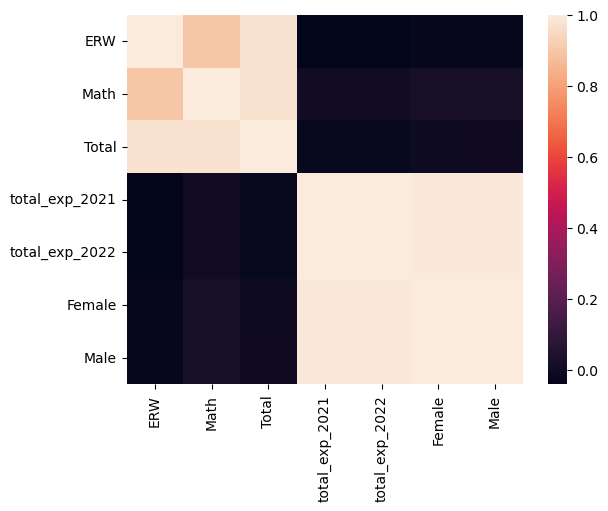

In [116]:
sns.heatmap(final.corr())

# Grad rates


In [117]:
grad_rates = pd.read_excel('Downloads/grad_rates.xlsx')
grad_rates.head()


CALC_FOR_STATE_ACCT  DISTRICT       DISTNAME  COUNTY         CNTYNAME  \
0                  No      1902     Cayuga ISD       1  Anderson County   
1                 Yes      1902     Cayuga ISD       1  Anderson County   
2                  No      1903    Elkhart ISD       1  Anderson County   
3                 Yes      1903    Elkhart ISD       1  Anderson County   
4                  No      1904  Frankston ISD       1  Anderson County   

   REGION REGNNAME DIST_ALLD DIST_ALLN_CMP2 DIST_ALLN_GRAD  ...  \
0       7  Kilgore        37             37             37  ...   
1       7  Kilgore        37             37             37  ...   
2       7  Kilgore        92             92             92  ...   
3       7  Kilgore        92             92             92  ...   
4       7  Kilgore        42             41             40  ...   

  DIST_TTLN_CONT  DIST_TTLN_TXCHSE DIST_TTLN_DROP  DIST_TTLR_CMP2  \
0              0                 0              0           100.0   
1              0                 0              0           100.0   
2              0                 0              0           100.0   
3              0                 0              0           100.0   
4              0                 1              1            97.6   

   DIST_TTLR_GRAD  DIST_TTLR_CONT DIST_TTLR_TXCHSE  DIST_TTLR_DROP  \
0           100.0             0.0              0.0             0.0   
1           100.0             0.0              0.0             0.0   
2           100.0             0.0              0.0             0.0   
3           100.0             0.0              0.0             0.0   
4            95.2             0.0              2.4             2.4   

  DIST_TTLR_RAED DIST_EXCL  
0           94.6         0  
1           94.6         0  
2           83.7         0  
3           83.7         0  
4          100.0         0  

[5 rows x 368 columns]

In [118]:
grad_rates.columns

Index(['CALC_FOR_STATE_ACCT', 'DISTRICT', 'DISTNAME', 'COUNTY', 'CNTYNAME',
       'REGION', 'REGNNAME', 'DIST_ALLD', 'DIST_ALLN_CMP2', 'DIST_ALLN_GRAD',
       ...
       'DIST_TTLN_CONT', 'DIST_TTLN_TXCHSE', 'DIST_TTLN_DROP',
       'DIST_TTLR_CMP2', 'DIST_TTLR_GRAD', 'DIST_TTLR_CONT',
       'DIST_TTLR_TXCHSE', 'DIST_TTLR_DROP', 'DIST_TTLR_RAED', 'DIST_EXCL'],
      dtype='object', length=368)

In [119]:
columns_to_keep = ['DISTRICT', 'DIST_ALLR_GRAD','DIST_ALLR_DROP']  # columns to keep
grad_rates = grad_rates[columns_to_keep]

In [120]:
grad_rates.head()

DISTRICT  DIST_ALLR_GRAD  DIST_ALLR_DROP
0      1902           100.0             0.0
1      1902           100.0             0.0
2      1903           100.0             0.0
3      1903           100.0             0.0
4      1904            95.2             2.4

In [121]:
#Check all data types are correct, 
new = grad_rates['DISTRICT'].astype(str).str.zfill(6)


In [122]:
grad_rates.loc['DISTRICT'] = new

In [123]:
grad_rates.head()

DISTRICT  DIST_ALLR_GRAD  DIST_ALLR_DROP
0    1902.0           100.0             0.0
1    1902.0           100.0             0.0
2    1903.0           100.0             0.0
3    1903.0           100.0             0.0
4    1904.0            95.2             2.4

In [135]:
grad_rates.drop(grad_rates.index[-1], inplace=True)


In [148]:
print(final.dtypes)
print(grad_rates.dtypes)

district_code      object
ERW               float64
Math              float64
Total             float64
total_exp_2021    float64
total_exp_2022    float64
Female            float64
Male              float64
dtype: object
DISTRICT          float64
DIST_ALLR_GRAD    float64
DIST_ALLR_DROP    float64
dtype: object


In [149]:
final['district_code']=final['district_code'].astype(float)

In [150]:
print(final.dtypes)

district_code     float64
ERW               float64
Math              float64
Total             float64
total_exp_2021    float64
total_exp_2022    float64
Female            float64
Male              float64
dtype: object


In [144]:
final.head()


District         ERW        Math        Total  total_exp_2021  \
0   001902  509.280000  480.760000   990.280000       6910774.0   
1   001903  493.230769  474.538462   967.653846      13693296.0   
2   001904  502.269231  473.115385   975.384615       9568092.0   
3   001906  524.391304  487.826087  1012.304348       4709122.0   
4   001907  529.892857  530.750000  1060.392857      43017866.0   

   total_exp_2022  Female    Male  
0       7605940.0   287.0   276.0  
1      14718123.0   560.0   589.0  
2      11253313.0   363.0   438.0  
3       4915852.0   162.0   174.0  
4      45476376.0  1593.0  1762.0

In [140]:
final.drop(columns=['district_code'],inplace=True)

In [145]:
final.rename(columns={'District':'district_code'},inplace=True)

In [146]:
final.head()

district_code         ERW        Math        Total  total_exp_2021  \
0        001902  509.280000  480.760000   990.280000       6910774.0   
1        001903  493.230769  474.538462   967.653846      13693296.0   
2        001904  502.269231  473.115385   975.384615       9568092.0   
3        001906  524.391304  487.826087  1012.304348       4709122.0   
4        001907  529.892857  530.750000  1060.392857      43017866.0   

   total_exp_2022  Female    Male  
0       7605940.0   287.0   276.0  
1      14718123.0   560.0   589.0  
2      11253313.0   363.0   438.0  
3       4915852.0   162.0   174.0  
4      45476376.0  1593.0  1762.0

In [151]:
combined_with_grad = pd.merge(final, grad_rates, left_on='district_code',right_on='DISTRICT',)


In [152]:
combined_with_grad.head()

district_code         ERW        Math       Total  total_exp_2021  \
0         1902.0  509.280000  480.760000  990.280000       6910774.0   
1         1902.0  509.280000  480.760000  990.280000       6910774.0   
2         1903.0  493.230769  474.538462  967.653846      13693296.0   
3         1903.0  493.230769  474.538462  967.653846      13693296.0   
4         1904.0  502.269231  473.115385  975.384615       9568092.0   

   total_exp_2022  Female   Male  DISTRICT  DIST_ALLR_GRAD  DIST_ALLR_DROP  
0       7605940.0   287.0  276.0    1902.0           100.0             0.0  
1       7605940.0   287.0  276.0    1902.0           100.0             0.0  
2      14718123.0   560.0  589.0    1903.0           100.0             0.0  
3      14718123.0   560.0  589.0    1903.0           100.0             0.0  
4      11253313.0   363.0  438.0    1904.0            95.2             2.4

In [153]:
combined_with_grad.drop(columns={'DISTRICT'},inplace=True)

In [154]:
combined_with_grad.head()

district_code         ERW        Math       Total  total_exp_2021  \
0         1902.0  509.280000  480.760000  990.280000       6910774.0   
1         1902.0  509.280000  480.760000  990.280000       6910774.0   
2         1903.0  493.230769  474.538462  967.653846      13693296.0   
3         1903.0  493.230769  474.538462  967.653846      13693296.0   
4         1904.0  502.269231  473.115385  975.384615       9568092.0   

   total_exp_2022  Female   Male  DIST_ALLR_GRAD  DIST_ALLR_DROP  
0       7605940.0   287.0  276.0           100.0             0.0  
1       7605940.0   287.0  276.0           100.0             0.0  
2      14718123.0   560.0  589.0           100.0             0.0  
3      14718123.0   560.0  589.0           100.0             0.0  
4      11253313.0   363.0  438.0            95.2             2.4

In [155]:
combined_with_grad.corr()

district_code       ERW      Math     Total  total_exp_2021  \
district_code        1.000000  0.015734  0.049991  0.034201        0.002845   
ERW                  0.015734  1.000000  0.894971  0.972434       -0.040355   
Math                 0.049991  0.894971  1.000000  0.974322        0.007459   
Total                0.034201  0.972434  0.974322  1.000000       -0.016353   
total_exp_2021       0.002845 -0.040355  0.007459 -0.016353        1.000000   
total_exp_2022       0.000262 -0.040523  0.007471 -0.016427        0.998852   
Female               0.002985 -0.023974  0.023192  0.000140        0.992055   
Male                 0.002823 -0.023027  0.023558  0.000809        0.991340   
DIST_ALLR_GRAD      -0.000879  0.209133  0.224371  0.222912       -0.108866   
DIST_ALLR_DROP      -0.083541 -0.233140 -0.247979 -0.247481        0.154836   

                total_exp_2022    Female      Male  DIST_ALLR_GRAD  \
district_code         0.000262  0.002985  0.002823       -0.000879   
ERW                  -0.040523 -0.023974 -0.023027        0.209133   
Math                  0.007471  0.023192  0.023558        0.224371   
Total                -0.016427  0.000140  0.000809        0.222912   
total_exp_2021        0.998852  0.992055  0.991340       -0.108866   
total_exp_2022        1.000000  0.993868  0.993223       -0.108542   
Female                0.993868  1.000000  0.999771       -0.099634   
Male                  0.993223  0.999771  1.000000       -0.096982   
DIST_ALLR_GRAD       -0.108542 -0.099634 -0.096982        1.000000   
DIST_ALLR_DROP        0.155053  0.139456  0.137524       -0.721258   

                DIST_ALLR_DROP  
district_code        -0.083541  
ERW                  -0.233140  
Math                 -0.247979  
Total                -0.247481  
total_exp_2021        0.154836  
total_exp_2022        0.155053  
Female                0.139456  
Male                  0.137524  
DIST_ALLR_GRAD       -0.721258  
DIST_ALLR_DROP        1.000000

<AxesSubplot:>

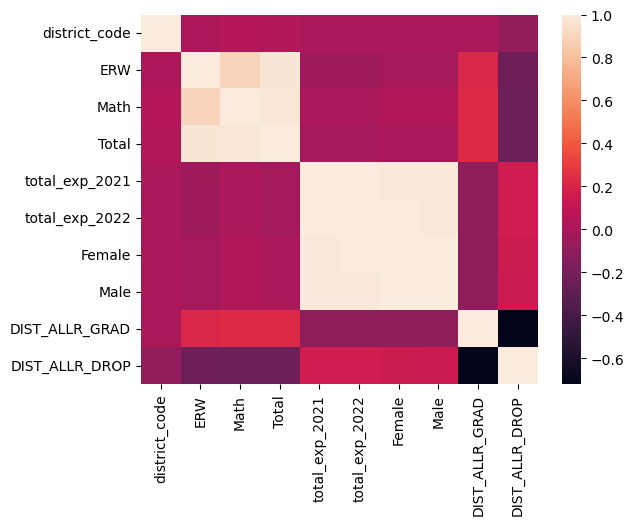

In [156]:
sns.heatmap(combined_with_grad.corr())